In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

dataset = pd.read_excel(r'C:\Users\Admin\Downloads\SD03Q02\SD03Q02\Social_Network_Ads.xlsx')
dataset.head()



,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [96]:
dataset['Gender '].fillna(value=dataset['Gender '].mode()[0], inplace=True)
dataset['Gender ']= dataset["Gender "].replace("Female", "1")
dataset['Gender ']= dataset["Gender "].replace("Male", "0")
dataset['Gender ']= dataset["Gender "].replace("Other", "2")

<function matplotlib.pyplot.show(*args, **kw)>

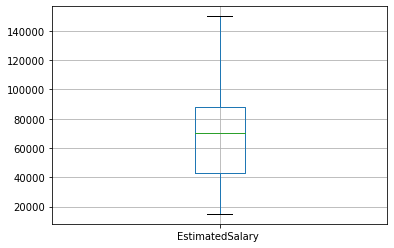

In [97]:
dataset.boxplot(column=["EstimatedSalary "])
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

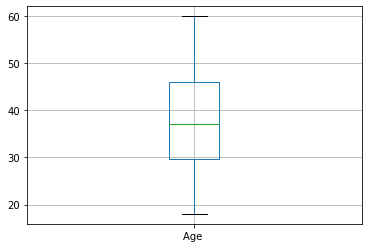

In [98]:
dataset.boxplot(column=["Age "])
plt.show

# decision tree classifier


In [105]:
class TreeNode:
    def __init__(self, data,output):
        # data represents the feature upon which the node was split when fitting the training data
        # data = None for leaf node
        self.data = data
        # children of a node are stored as a dicticionary with key being the value of feature upon which the node was split
        # and the corresponding value stores the child TreeNode
        self.children = {}
        # output represents the class with current majority at this instance of the decision tree
        self.output = output
        # index will be used to assign a unique index to each node
        self.index = -1
        
    def add_child(self,feature_value,obj):
        self.children[feature_value] = obj
class DecisionTreeClassifier:
    def __init__(self):
        # root represents the root node of the decision tree built after fitting the training data
        self.__root = None

    def __count_unique(self,Y):
        # returns a dictionary with keys as unique values of Y(i.e no of classes) and the corresponding value as its frequency
        d = {}
        for i in Y:
            if i not in d:
                d[i]=1
            else:
                d[i]+=1
        return d
    def __entropy(self,Y):
        # returns the entropy 
        freq_map = self.__count_unique(Y)
        entropy_ = 0
        total = len(Y)
        for i in freq_map:
            p = freq_map[i]/total
            entropy_ += (-p)*math.log2(p)
        return entropy_
    def __gain_ratio(self,X,Y,selected_feature):
        # returns the gain ratio
        info_orig = self.__entropy(Y) # info_orig represents entropy before splitting
        info_f = 0  # info_f represents entropy after splitting upon the selected feature
        split_info = 0
        values = set(X[:,selected_feature])
        df = pd.DataFrame(X)
        # Adding Y values as the last column in the dataframe 
        df[df.shape[1]] = Y
        initial_size = df.shape[0] 
        for i in values:
            df1 = df[df[selected_feature] == i]
            current_size = df1.shape[0]
            info_f += (current_size/initial_size)*self.__entropy(df1[df1.shape[1]-1])
            split_info += (-current_size/initial_size)*math.log2(current_size/initial_size)

        # to handle the case when split info = 0 which leads to division by 0 error
        if split_info == 0 :
            return math.inf

        info_gain = info_orig - info_f
        gain_ratio = info_gain / split_info
        return gain_ratio
    def __gini_index(self,Y):
        # returns the gini index 
        freq_map = self.__count_unique(Y)
        gini_index_ = 1
        total = len(Y)
        for i in freq_map:
            p = freq_map[i]/total
            gini_index_ -= p**2
        return gini_index_
    def __gini_gain(self,X,Y,selected_feature):
        # returns the gini gain
        gini_orig = self.__gini_index(Y) # gini_orig represents gini index before splitting
        gini_split_f = 0 # gini_split_f represents gini index after splitting upon the selected feature
        values = set(X[:,selected_feature])
        df = pd.DataFrame(X)
        # Adding Y values as the last column in the dataframe 
        df[df.shape[1]] = Y
        initial_size = df.shape[0] 
        for i in values:
            df1 = df[df[selected_feature] == i]
            current_size = df1.shape[0]
            gini_split_f += (current_size/initial_size)*self.__gini_index(df1[df1.shape[1]-1])

        gini_gain_ = gini_orig - gini_split_f
        return gini_gain_
    def __decision_tree(self,X,Y,features,level,metric,classes):
        # returns the root of the Decision Tree(which consists of TreeNodes) built after fitting the training data
        # Here Nodes are printed as in PREORDER traversl
        # classes represents the different classes present in the classification problem 
        # metric can take value gain_ratio or gini_index
        # level represents depth of the tree
        # We split a node on a particular feature only once (in a given root to leaf node path)
        
        
        # If the node consists of only 1 class
        if len(set(Y)) == 1:
            print("Level",level)
            output = None
            for i in classes:
                if i in Y:
                    output = i
                    print("Count of",i,"=",len(Y))
                else :
                    print("Count of",i,"=",0)
            if metric == "gain_ratio":
                print("Current Entropy is =  0.0")
            elif metric == "gini_index":
                print("Current Gini Index is =  0.0")

            print("Reached leaf Node")
            print()
            return TreeNode(None,output)
        if len(features) == 0:
            print("Level",level)
            freq_map = self.__count_unique(Y)
            output = None
            max_count = -math.inf
            for i in classes:
                if i not in freq_map:
                    print("Count of",i,"=",0)
                else :
                    if freq_map[i] > max_count :
                        output = i
                        max_count = freq_map[i]
                    print("Count of",i,"=",freq_map[i])

            if metric == "gain_ratio":
                print("Current Entropy  is =",self.__entropy(Y))
            elif metric == "gini_index":
                print("Current Gini Index is =",self.__gini_index(Y))            

            print("Reached leaf Node")
            print()
            return TreeNode(None,output)
        max_gain = -math.inf
        final_feature = None
        for f in features :
            if metric == "gain_ratio":
                current_gain = self.__gain_ratio(X,Y,f)
            elif metric =="gini_index":
                current_gain = self.__gini_gain(X,Y,f)

            if current_gain > max_gain:
                max_gain = current_gain
                final_feature = f

        print("Level",level)
        freq_map = self.__count_unique(Y)
        output = None
        max_count = -math.inf

        for i in classes:
            if i not in freq_map:
                print("Count of",i,"=",0)
            else :
                if freq_map[i] > max_count :
                    output = i
                    max_count = freq_map[i]
                print("Count of",i,"=",freq_map[i])

        if metric == "gain_ratio" :        
            print("Current Entropy is =",self.__entropy(Y))
            print("Splitting on feature  X[",final_feature,"] with gain ratio ",max_gain,sep="")
            print()
        elif metric == "gini_index":
            print("Current Gini Index is =",self.__gini_index(Y))
            print("Splitting on feature  X[",final_feature,"] with gini gain ",max_gain,sep="")
            print()
            
        unique_values = set(X[:,final_feature]) # unique_values represents the unique values of the feature selected
        df = pd.DataFrame(X)
        # Adding Y values as the last column in the dataframe
        df[df.shape[1]] = Y

        current_node = TreeNode(final_feature,output)

        # Now removing the selected feature from the list as we do not want to split on one feature more than once(in a given root to leaf node path)
        index  = features.index(final_feature)
        features.remove(final_feature)
        for i in unique_values:
            # Creating a new dataframe with value of selected feature = i
            df1 = df[df[final_feature] == i]
            # Segregating the X and Y values and recursively calling on the splits
            node = self.__decision_tree(df1.iloc[:,0:df1.shape[1]-1].values,df1.iloc[:,df1.shape[1]-1].values,features,level+1,metric,classes)
            current_node.add_child(i,node)

        # Add the removed feature     
        features.insert(index,final_feature)

        return current_node
    def fit(self,X,Y,metric="gain_ratio"):
        # Fits to the given training data
        # metric can take value gain_ratio or gini_index
        features = [i for i in range(len(X[0]))]
        classes = set(Y)
        level = 0
        if metric != "gain_ratio" :
            if metric != "gini_index":
                metric="gain_ratio"  # if user entered a value which was neither gini_index nor gain_ratio
        self.__root = self.__decision_tree(X,Y,features,level,metric,classes)
    def __predict_for(self,data,node):
        # predicts the class for a given testing point and returns the answer
        
        # We have reached a leaf node
        if len(node.children) == 0 :
            return node.output

        val = data[node.data] # represents the value of feature on which the split was made       
        if val not in node.children :
            return node.output
        return self.__predict_for(data,node.children[val])
    def predict(self,X):
        # This function returns Y predicted
        # X should be a 2-D np array
        Y = np.array([0 for i in range(len(X))])
        for i in range(len(X)):
            Y[i] = self.__predict_for(X[i],self.__root)
        return Y
    def score(self,X,Y):
        # returns the mean accuracy
        Y_pred = self.predict(X)
        count = 0
        for i in range(len(Y_pred)):
            if Y_pred[i] == Y[i]:
                count+=1
        return count/len(Y_pred)
    def export_tree_pdf(self,filename=None):
        # returns the tree as dot data
        # if filename is specified the function 
        # will save the pdf file in current directory which consists of the visual reresentation of the tree
        import pydotplus
        from collections import deque
        dot_data = '''digraph Tree {
node [shape=box] ;'''
        
        queue = deque()
        
        r = self.__root
        queue.append(r)
        count = 0
        if r.index == -1:
            r.index = count
        
        dot_data = dot_data + "\n{} [label=\"Feature to split upon : X[{}]\\nOutput at this node : {}\" ];".format(count,r.data,r.output) 
        
        # Doing LEVEL ORDER traversal in the tree (using a queue)
        while len(queue) != 0 :
            node = queue.popleft()
            for i in node.children:
                count+=1
                if(node.children[i].index==-1):
                    node.children[i].index = count
                
                # Creating child node
                dot_data = dot_data + "\n{} [label=\"Feature to split upon : X[{}]\\nOutput at this node : {}\" ];".format(node.children[i].index,node.children[i].data,node.children[i].output) 
                # Connecting parent node with child
                dot_data = dot_data + "\n{} -> {} [ headlabel=\"Feature value = {}\"]; ".format(node.index,node.children[i].index,i)
                # Adding child node to queue
                queue.append(node.children[i])
        
        dot_data = dot_data + "\n}"

        if filename != None:    
            graph = pydotplus.graph_from_dot_data(dot_data)
            graph.write_pdf(filename)    
        
        return dot_data
clf1 = DecisionTreeClassifier()

#x = np.array([[0,0],
#y = np.array([0, 
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

clf1.fit(x,y)
Y_pred = clf1.predict(x)
print("Predictions :",Y_pred)
print()
print("Score :",clf1.score(x,y)) # Score on training data
print()
#print("DOT DATA :-",clf1.export_tree_pdf(filename="tree_OR.pdf"))


# In[5]:


# Using our algorithm on a random dataset
from sklearn import datasets
# Generating a random dataset
X,Y = datasets.make_classification(n_samples=100, n_features=5, n_classes=3,n_informative=3 , random_state=0)
# To reduce the values a feature can take ,converting floats to int
for i in range(len(X)):
    for j in range(len(X[0])):
        X[i][j] = int(X[i][j])
        
clf2 = DecisionTreeClassifier()
clf2.fit(X,Y,metric='gini_index')
Y_pred2 = clf2.predict(X)
print("Predictions : ",Y_pred2)
print()
our_score = clf2.score(X,Y)
print("Score :",our_score) # score on training data
print()


Level 0
Count of 0 = 257
Count of 1 = 143
Current Entropy is = 0.9405884140193839
Splitting on feature  X[0] with gain ratio 0.0846285292116425

Level 1
Count of 0 = 5
Count of 1 = 0
Current Entropy is =  0.0
Reached leaf Node

Level 1
Count of 0 = 7
Count of 1 = 0
Current Entropy is =  0.0
Reached leaf Node

Level 1
Count of 0 = 7
Count of 1 = 0
Current Entropy is =  0.0
Reached leaf Node

Level 1
Count of 0 = 4
Count of 1 = 0
Current Entropy is =  0.0
Reached leaf Node

Level 1
Count of 0 = 5
Count of 1 = 0
Current Entropy is =  0.0
Reached leaf Node

Level 1
Count of 0 = 6
Count of 1 = 0
Current Entropy is =  0.0
Reached leaf Node

Level 1
Count of 0 = 9
Count of 1 = 0
Current Entropy is =  0.0
Reached leaf Node

Level 1
Count of 0 = 6
Count of 1 = 0
Current Entropy is =  0.0
Reached leaf Node

Level 1
Count of 0 = 16
Count of 1 = 0
Current Entropy is =  0.0
Reached leaf Node

Level 1
Count of 0 = 11
Count of 1 = 2
Current Entropy is = 0.6193821946787638
Splitting on feature  X[1] w

In [106]:
from matplotlib.colors import ListedColormap
X_set, y_set = x, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, y_hat_test.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('pink','grey')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

MemoryError: Unable to allocate 443. GiB for an array with shape (13500200, 4400) and data type float64

# KNN CLASSIFIER


   User ID   Gender   Age   EstimatedSalary   Purchased
0  15624510    Male     19             19000          0
1  15810944    Male     35             20000          0
2  15668575  Female     26             43000          0
3  15603246  Female     27             57000          0
4  15804002    Male     19             76000          0
           User ID         Age   EstimatedSalary    Purchased
count  4.000000e+02  400.000000        400.000000  400.000000
mean   1.569154e+07   37.655000      69742.500000    0.357500
std    7.165832e+04   10.482877      34096.960282    0.479864
min    1.556669e+07   18.000000      15000.000000    0.000000
25%    1.562676e+07   29.750000      43000.000000    0.000000
50%    1.569434e+07   37.000000      70000.000000    0.000000
75%    1.575036e+07   46.000000      88000.000000    1.000000
max    1.581524e+07   60.000000     150000.000000    1.000000
                      Age   EstimatedSalary   Purchased
Age               1.000000          0.155238   0.6

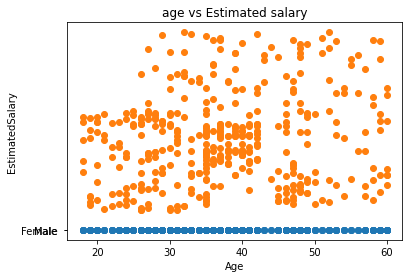

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#reading the data using pandas
dat = pd.read_excel(r'C:\Users\Admin\Downloads\SD03Q02\SD03Q02\Social_Network_Ads.xlsx')

#viewing the first 5 data
print(dat.head(5))

#description of the data
print(dat.describe())

dat['Gender '].fillna(value=dat['Gender '].mode()[0], inplace=True)
dat['Gender ']= dat["Gender "].replace("Female", "1")
dat['Gender ']= dat["Gender "].replace("Male", "0")
dat['Gender ']= dat["Gender "].replace("Other", "2")

#plotting various combinations of parameter
plt.scatter(dat['Age '], dat['Gender '])
plt.xlabel('Gender', )
plt.ylabel('age')
plt.title('age vs gender')


plt.scatter(dat['Age '], dat['EstimatedSalary '])
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('age vs Estimated salary')



#finding the correlation amoung the parameters
print(dat.iloc[:,1:].corr())

features = ['Age ','EstimatedSalary ']
X = dat[features]
y = dat.iloc[:,4]


#splitting of dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#standardize the training and test dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



#function to calculate euclidean distance
def euclid_dist(X1,X2):
    dist = np.sum((X1 - X2)**2)
    return np.sqrt(dist)

#function of knn predict

def knn_predict(X_train, X_test, y_train, y_test, k):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = euclid_dist(test_point, train_point)
            distances.append(distance)
        
        # Storing distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances and considering the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test

# predicting on test dataset
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=3)
print(y_test)
print(y_hat_test)
    
#calculating accuracy of the model built from scratch
from sklearn.metrics import accuracy_score

print('Accuracy:', accuracy_score(y_test,y_hat_test))


In [108]:
X = dataset.iloc[:,[2,3]].values #[:,1] would return an array but we want X to be a 
#matrix

#Create array of dependent variable
y = dataset.iloc[:,4].values

#Splitting into test set and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

#Predicting the test set value
y_pred = classifier.predict(X_test)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


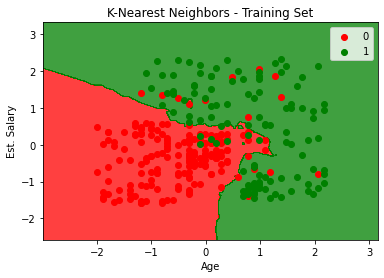

In [112]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1,
                              step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1,
                              step = 0.01))
plt.contourf(X1,X2,classifier.predict(
    np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
    cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title("K-Nearest Neighbors - Training Set")
plt.xlabel("Age")
plt.ylabel("Est. Salary")
plt.legend()
plt.show()